# Notebook 17 - Randomness, Random Walks, and Monte Carlo Methods

### Random numbers from numpy
Really they are "pseudo-random". They approximate a truly random sequence, but they are determined by an algorithm and are completely determined by the "seed"

In [30]:
import numpy as np
r = np.random.rand()  # random float in [0.0,1)
print(r)

0.3644253356120991


In [3]:
r1 = np.random.rand()  
r2 = np.random.rand()  
r3 = np.random.rand()  
r4 = np.random.rand()  
print(r1)
print(r2)
print(r3)
print(r4)

0.21260912734145876
0.1233076286633642
0.6781911131638843
0.9058038302877934


In [4]:
# note: other functions in the random package do the same thing 
# They are all an alias of random_sample
r1 = np.random.random_sample()
r2 = np.random.rand()
r3 = np.random.random()
r4 = np.random.ranf()
r5 = np.random.sample()
print(r1)
print(r2)
print(r3)
print(r4)
print(r5)

0.21979185378036514
0.744487992741118
0.48204998017992795
0.6012536255332395
0.7303158994212864


In [36]:
# return a float between 0 and 1000
r1 = np.random.rand() * 1000
r2 = np.random.uniform(0,1000) #[low=0.0, high=1.0)  p(x)=1/(b-a)
print(r1)
print(r2)

779.4139981668063
410.1410652926529


In [32]:
r2 = np.random.uniform(-10,-5)
print(r2)

-7.486569081249148


In [41]:
r2 = np.random.randint(0,5)           # random integer in [low,high)
print(r2)

4


In [8]:
# You can also return an array filled with random numbers
r  = np.random.rand()
a1 = np.random.rand(3)  # this paramter is called "size" 
a2 = np.random.rand(4,4)
print(type(r))
print(r)
print()
print(type(a1))
print(a1)
print()
print(type(a2))
print(a2)

<class 'float'>
0.3504648182665794

<class 'numpy.ndarray'>
[ 0.08391879  0.19734934  0.56294653]

<class 'numpy.ndarray'>
[[ 0.02181736  0.15144784  0.0225524   0.73288809]
 [ 0.18419178  0.91238375  0.53065425  0.74090348]
 [ 0.47653005  0.83557241  0.86541634  0.68701034]
 [ 0.85006295  0.85709262  0.20199983  0.22064945]]


In [9]:
a3 = np.random.uniform(0,1000,5)  #uniform([low, high, size])
print(a3)
print()
a3 = np.random.randint(0,1000,5) #randint(low[, high, size,)
print(a3)

[  91.80775101  673.66448224   56.22988676  915.13092438   67.82626918]

[531 118 208 360 622]


In [44]:
# You can set to seed to have repeatable random numbers
np.random.seed(5)
print(np.random.rand())
np.random.seed(5)
print(np.random.rand())
np.random.seed()
print(np.random.rand())
np.random.seed(5)
print(np.random.rand())

0.22199317108973948
0.22199317108973948
0.5424428666352563
0.22199317108973948


In [48]:
x = [103,55,29,502] 
np.random.choice(x)  # randomly select from a list or array

29

In [52]:
# randomly select 3 elements from a list or array and return an array
np.random.choice(x,3,replace=False)

array([ 29,  55, 103])

In [20]:
# replace = after you select one element, put it back before selecting the next
np.random.choice(x,3,replace=True)  # replace=True is the default

array([ 55, 502,  55])

### Random numbers from python's built-in library
Again these are "pseudo-random"
https://docs.python.org/3/library/random.html

In [15]:
from random import random
random() # random float in the half open interval [0.0,1)

0.6692565641596494

In [16]:
from random import uniform
uniform(1, 10)  # random float in the half open interval  [1.0,10.0)

4.156836460108362

In [58]:
from random import randrange
randrange(10) # random integer in [0,9]

2

In [61]:
randrange(0, 101, 2) # random even integer in [0,100]  -  (start, stop[, step])

28

In [64]:
from random import choice
r = ['dog', 'cat', 'horse', 'bird']
choice(r)    # randomly select a single element from a sequence

'dog'

In [67]:
from random import shuffle
shuffle(r)    # randomly shuffle a list
print(r)  

['cat', 'dog', 'horse', 'bird']


In [69]:
from random import sample
sample(r, k=2) # randomly select k elements of a list and create a new list. "without replacement"

['bird', 'horse']

In [22]:
from random import SystemRandom
print(SystemRandom().choice(r))   # more secure random

horse


### Examples: Using random numbers in simulations and calculations


#### Monte Carlo Methods
* Computational techniques using random sampling
    * Monte Carlo Integration - "Throw many darts"
    * Optimization - minimize or maximize in a N dimensional space
    * Simulation
* Very wide usage in many fields
    

#### Random walk
* Simulate the path of a particle after N random steps
* Related to many real-world effects
    * Brownian motion
    * Diffusion
    * Ecology (foraging animals)
    * Economics (stock prices)


#### Monte Carlo Example

Decay of Thallium 208 to Lead 208 with a half life $\tau$= 3.053 minutes. Simulate the number of atoms as funcdtion of time.

The number of thallium atoms as a function of time is given by:

$N(t) = N(0)2^{-t/\tau}$

The fraction of atoms remaining is therefore

$N(T)/N(0) = 2^{-t/\tau}$ 

The fraction that have decayed is  $1-2^{-t/\tau}$ which is also equal to the probability that any singele atom has decayed.

Simulate the decay of 1000 atoms using random numbers. Every second we will consider each thallium atom and use the probabiliy  $p(t)=1-2^{-t/\tau}$ to determine if a decay occurs.

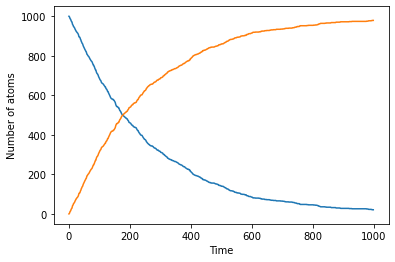

In [5]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

# Make the graph
plot(tpoints,Tlpoints)
plot(tpoints,Pbpoints)
xlabel("Time")
ylabel("Number of atoms")
show()


In [71]:
# Random Walk 1
# Very basic 1D random walk
#
import numpy as np

n_steps  = 200     # Number of steps
position = 0     # Current position along the x-axis
verbose  = False  # Detailed print

if verbose:
    print("Flip details:")

for step in range(n_steps):
    
    # randomly pick 0 or 1
    coin = np.random.randint(0,2) # random integer in [low,high)
    
    # if 0(heads), move one step in the +x direction
    if coin==0:
        position+=1
        if verbose:
            print(" Heads")
            
    # if 1(tails), move one step  in the -x direcgtion
    if coin==1:
        position-=1
        if verbose:
            print(" Tails")
            
print("Final position:", position)

Final position: -14


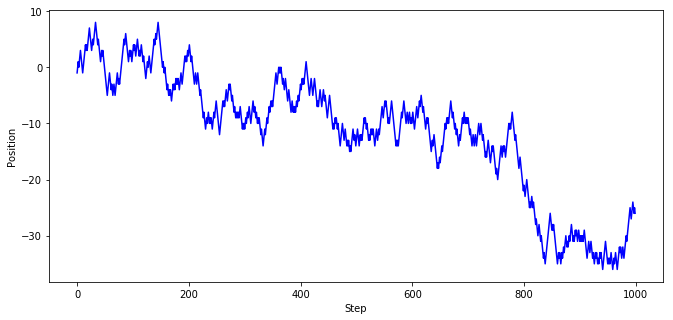

In [75]:
# Random Walk 2
# Very basic 1D random walk
# Plot the drunk person's path
import numpy as np
import matplotlib.pyplot as plt

n_steps  = 1000     # Number of steps
position = 0     # Current position along the x-axis
verbose  = False  # Detailed print
position = 0     # Set initial position

position_tracker = np.zeros(n_steps) 
step_tracker = np.zeros(n_steps) 

if verbose:
    print("Flip details:")

for step in range(n_steps):
    
    # randomly pick 0 or 1
    coin = np.random.randint(0,2) # random integer in [low,high)
    
    # if 0(heads), move one step in the +x direction
    if coin==0:
        position+=1
        if verbose:
            print(" Heads")
            
    # if 1(tails), move one step  in the -x direcgtion
    if coin==1:
        position-=1
        if verbose:
            print(" Tails")
            
    # Save the position for this step in an array        
    position_tracker[step] = position
    # Save the step number
    step_tracker[step]     = step

#print(step_tracker)
#print(position_tracker)
plt.rcParams['figure.figsize'] = 11, 5 # Make the plot wider (11 inches wide, 5 inches tall)
plt.plot(step_tracker,position_tracker,"b-")
plt.xlabel("Step")
plt.ylabel("Position")
plt.show()

(5, 200)


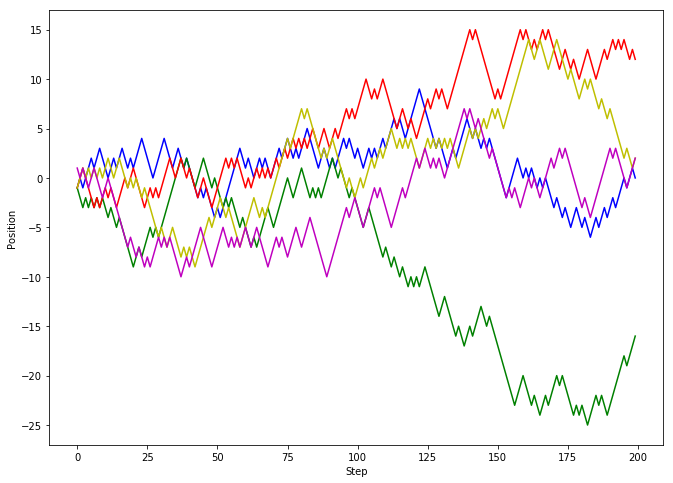

In [252]:
# Random Walk 3
# Very basic 1D random walk
# Plot multiple drunk people's paths
import numpy as np
import matplotlib.pyplot as plt

n_people = 5      # Number of people

n_steps  = 200    # Number of steps
position = 0      # Current position along the x-axis
verbose  = False  # Detailed print

position_tracker = np.zeros(shape=(n_people,n_steps)) 
step_tracker     = np.zeros(n_steps) 

print(position_tracker.shape)

for drunk in range(n_people): 
    position = 0     # Set initial position
    for step in range(n_steps):

        # randomly pick 0 or 1
        coin = np.random.randint(0,2) # random integer in [low,high)

        # if 0(heads), move one step in the +x direction
        if coin==0:
            position+=1

        # if 1(tails), move one step  in the -x direcgtion
        if coin==1:
            position-=1

        # Save the position for this step in an array  
        #print("step",step,"drunk",drunk)

        position_tracker[drunk][step] = position
        # Save the step number
        step_tracker[step]     = step

    colors = ('b', 'g', 'r','y', 'm', 'c', 'k')
    color = colors[drunk]
    plt.plot(step_tracker,position_tracker[drunk,:],"-",color=color)

        
        
plt.rcParams['figure.figsize'] = 11, 8 # Make the plot wider (11 inches wide, 5 inches tall)
plt.xlabel("Step")
plt.ylabel("Position")
plt.show()

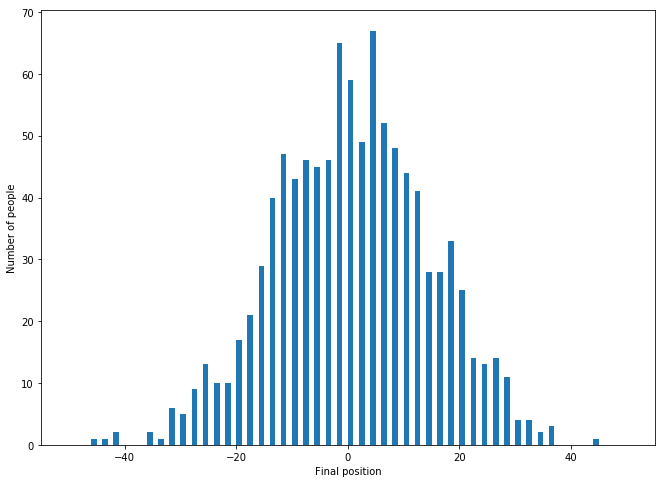

In [256]:
# Random Walk 4
# Very basic 1D random walk
# Plot the final position of many drunkards
import numpy as np
import matplotlib.pyplot as plt

n_steps  = 200    # Number of steps
n_people = 1000   # Number of people

final_positions = np.zeros(n_people) 
y = final_positions

for drunk in range(n_people):
    
    position = 0     # Set position along the x-axis to zero 
    
    for step in range(n_steps):

        # randomly pick 0 or 1
        coin = np.random.randint(0,2) # random integer in [low,high)

        # if 0(heads), move one step in the +x direction
        if coin==0:
            position+=1

        # if 1(tails), move one step  in the -x direcgtion
        if coin==1:
            position-=1

    final_positions[drunk] = position       
    
    
#plt.hist(final_positions, bins=2*n_steps,  range=(-n_steps,n_steps))#
plt.hist(final_positions, bins=100,  range=(-50,50))
plt.xlabel("Final position")
plt.ylabel("Number of people")
plt.show()


[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.
  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.
  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.
  91.  92.  93.  94.  95.  96.  97.  98.  99.]
[  0.99935179   1.38260623   1.70364316   1.99395486   2.30634256
   2.58419504   2.62999316   2.84730329   2.97813633   3.12537742
   3.38093242   3.6626788    3.75527149   3.74945543   3.93907806
   3.9378451    4.10848683   4.22006445   4.12992784   4.4786623
   4.59052241   4.89278816   4.86472363   5.12605111   5.09772655
   4.89161078   5.18930593   5.13305211   5.14893542   5.09375147
   5.50850252   5.53628178   5.48693138   5.52735018   5.97693701
   5.89770939   6.06560797   6.22349

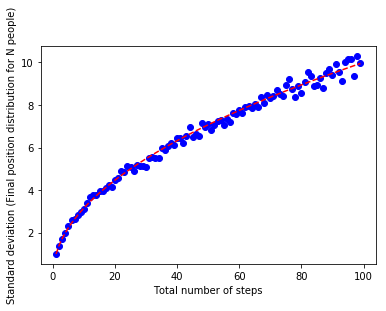

In [35]:
# Random Walk 5
# Very basic 1D random walk
# Plot standard deviation for different number of steps
import numpy as np
import matplotlib.pyplot as plt

n_steps  = 100    # Number of steps
n_people = 500   # Number of people


step_min = 1
step_max = n_steps

a_n_steps = np.zeros(step_max-step_min) 
a_pos_std = np.zeros(step_max-step_min) 
model     = np.zeros(step_max-step_min) 


count =0
for n_steps in range(step_min,step_max):

    final_positions = np.zeros(n_people) 
  
    for drunk in range(n_people):

        position = 0     # Set position along the x-axis to zero 

        for step in range(n_steps):

            # randomly pick 0 or 1
            coin = np.random.randint(0,2) # random integer in [low,high)

            # if 0(heads), move one step in the +x direction
            if coin==0:
                position+=1

            # if 1(tails), move one step  in the -x direcgtion
            if coin==1:
                position-=1

        final_positions[drunk] = position       

    final_pos_mean  = np.mean(final_positions)  # mean
    final_pos_std   = np.std(final_positions)   # standard deviation

    a_n_steps[count] = n_steps
    a_pos_std[count] = final_pos_std
    model[count]     = np.sqrt(n_steps)
    count+=1

print(a_n_steps)
print(a_pos_std)

plt.plot(a_n_steps,a_pos_std,"bo",linestyle='')
plt.plot(a_n_steps,model,"r--")
plt.xlabel("Total number of steps")
plt.ylabel("Standard deviation (Final position distribution for N people)")
plt.show()
